In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWg8oPko15OF8iCsrfbwes-r-kee2lG4WtAre_MpqGk3HaIgsKiB9Io


## 0. import & def

In [ ]:
!pwd

/content


In [ ]:
import os
os.chdir('/content/drive/Shareddrives/2021_IJERPH/dataset')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [ ]:
def myboxplt(df, columns):
    data = df[columns]
    sns.boxplot(data = data, palette = "Set2")
    plt.yscale('log')
    #plt.legend(loc='upper right')
    plt.title('plot of '+str(columns))
    plt.ylabel('rates(log)')

In [ ]:
def myplt(scz, nmh, columns, title):
    values = [] # means 
    yerr = [] # ste
    cols = []
    colors = [] # ["#FF73B8", "#FFFF36"]
    for col in columns:
      values.append(np.mean(scz[col]))
      values.append(np.mean(nmh[col]))
      print(values)
      yerr.append(stats.sem(scz[col]))
      yerr.append(stats.sem(nmh[col]))
      print(yerr)
      cols.append(col + '(scz)')
      cols.append(col + '(nmh)')
      print(cols)
      colors.append('#EEA990')
      colors.append('#8CABA8')
    plt.figure(figsize=(8,5))
    plt.bar(x = cols, height = values,yerr=yerr, capsize=10, color = colors, alpha = 0.7)
    plt.yticks(fontsize = 14)
    plt.xticks(fontsize = 14)
    #plt.ylabel('rates', fontsize = 17)
    plt.title('Mean of '+title+' with error bar', fontsize=18)
    plt.show

In [ ]:
def myplt2(scz, nmh, columns, title):
    values = [] # means 
    yerr = [] # ste
    cols = []
    colors = [] # ["#FF73B8", "#FFFF36"]
    for col in columns:
      values.append(np.mean(scz[col]))
      values.append(np.mean(nmh[col]))
      yerr.append(stats.sem(scz[col]))
      yerr.append(stats.sem(nmh[col]))
      cols.append(col + '(scz)')
      cols.append(col + '(nmh)')
      colors.append('#EEA990')
      colors.append('#8CABA8')
    plt.figure(figsize=(10,5))
    plt.bar(x = cols, height = values,yerr=yerr, capsize=10, color = colors, alpha = 0.7)
    plt.xticks(rotation =30)
    plt.yticks(fontsize = 11)
    plt.xticks(fontsize = 11)
    #plt.ylabel('rates', fontsize = 17)
    plt.title('Mean of '+title+' with error bar', fontsize=12)
    plt.show

In [ ]:
def myplt3(scz, nmh, columns, title, bar_width = 0.3, locate = 2, figsize=(10,5)):
  features=columns.copy()
  for i in range(len(features)):
    if features[i] == 'nonpers': features[i] = 'impers'
    features[i] = features[i][0].upper() + features[i][1:]
    print(features[i])
  cols=['Non-schizophrenia', 'Schizophrenia']
  pos = np.arange(bar_width, len(features)+bar_width)
  scz_scores = []
  nmh_scores = []
  yerr_s = []
  yerr_n = []
  for col in columns:
    scz_scores.append(np.mean(scz[col]))
    nmh_scores.append(np.mean(nmh[col]))
    yerr_s.append(stats.sem(scz[col]))
    yerr_n.append(stats.sem(nmh[col]))
  #plt.figure(dpi=300)
  plt.rcParams["figure.figsize"] = figsize
  plt.ylabel('Mean', fontsize=16) 
  plt.bar(pos, nmh_scores, bar_width, color='#8CABA8',yerr=yerr_n)

  plt.bar(pos+bar_width, scz_scores, bar_width,  color='#EEA990',  yerr=yerr_s)
  #plt.xticks(pos, features)
  plt.xticks(pos+bar_width/2, features, fontsize = 14)
  plt.yticks(fontsize = 14)
  #plt.xlabel(title, fontsize=16)
  
  plt.title(title ,fontsize=18)
  plt.legend(cols, loc=locate)
  plt.savefig(title+'.png', dpi=300)
  plt.show()

WC
Sixltr


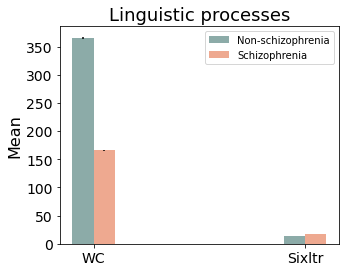

In [ ]:
myplt3(scz, nmh, ['WC', 'Sixltr'], 'Linguistic processes', bar_width = 0.1, figsize = (5,4), locate = 'best')

Past
Present
Future


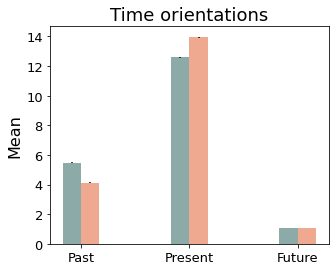

In [ ]:
myplt3(scz, nmh, ['Past', 'Present', 'Future'], 'Time orientations', bar_width = 0.17, figsize = (5,4), locate = 'best')

Positive
Negative
Anger
Anticipation
Fear
Disgust
Joy
Sadness
Surprise
Trust


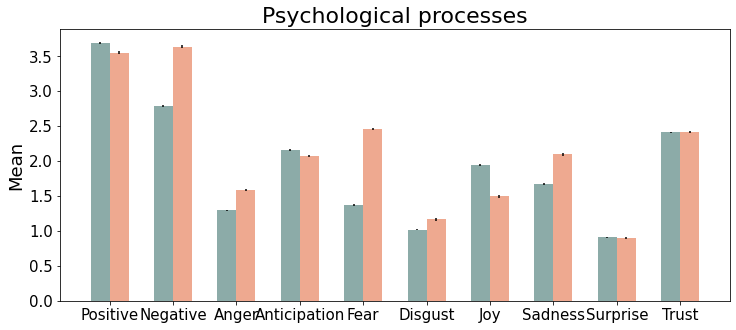

In [ ]:
myplt3(scz, nmh, ['Positive', 'Negative', 'anger', 'anticipation',  'fear', 'disgust','joy','sadness', 'surprise', 'trust'], 'Psychological processes', bar_width = 0.3, figsize = (12,5), locate = 'best')

Positive
Negative
Anger
Disgust
Fear
Anticipation
Joy
Sadness
Trust
Surprise


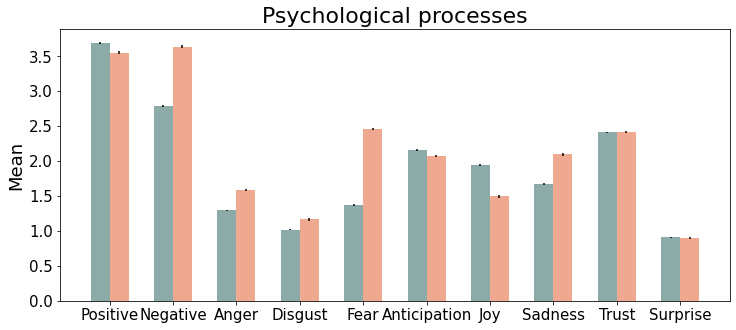

In [ ]:
myplt3(scz, nmh, ['Positive', 'Negative', 'anger','disgust',  'fear',  'anticipation', 'joy','sadness', 'trust' , 'surprise'], 'Psychological processes', bar_width = 0.3, figsize = (12,5), locate = 'best')

In [ ]:
scz.columns = nmh.columns = ['text', 'WC', 'Sixltr', 'PER', 'FPS', 'FPP',
       'SPS', 'TPS', 'TPP', 'IPER', 'Past', 'Present',
       'Future', 'Negative', 'Positive', 'anger', 'anticipation', 'disgust',
       'fear', 'joy', 'sadness', 'surprise', 'trust', 'illness_dist_0',
       'illness_dist_1', 'illness_dist_2', 'illness_dist_3', 'illness_dist_4',
       'illness_dist_5', 'illness_dist_6', 'illness_dist_7', 'illness_dist_8',
       'illness_dist_9', 'non_mh_dist_0', 'non_mh_dist_1', 'non_mh_dist_2',
       'non_mh_dist_3', 'non_mh_dist_4', 'non_mh_dist_5', 'non_mh_dist_6',
       'non_mh_dist_7', 'non_mh_dist_8', 'non_mh_dist_9']

PER
FPS
FPP
SPS
TPS
TPP
IPER


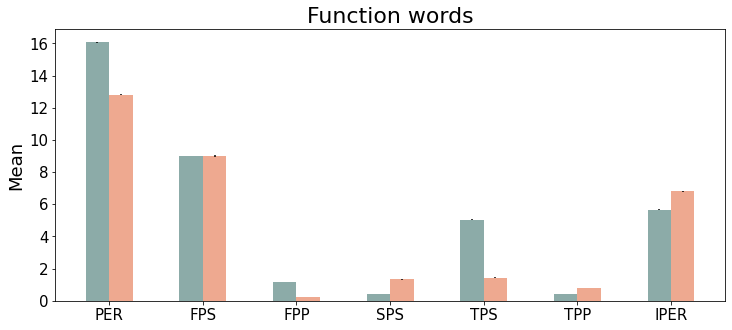

In [ ]:
myplt3(scz, nmh, ['PER', 'FPS', 'FPP','SPS', 'TPS', 'TPP', 'IPER'],'Function words', bar_width = 0.25, figsize = (12,5), locate = 'best')

PER
FPS
FPP
SPS
TPS
TPP
IPER


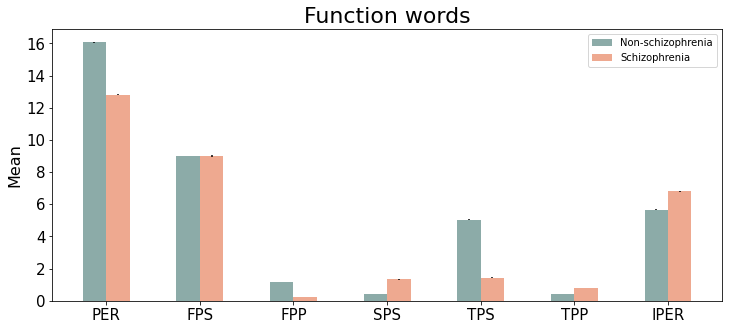

In [ ]:
# ver2
myplt3(scz, nmh, ['PER', 'FPS', 'FPP','SPS', 'TPS', 'TPP', 'IPER'],'Function words', bar_width = 0.25, figsize = (12,5), locate = 'best')

In [ ]:
!pwd

/content/drive/Shareddrives/2021_IJERPH/dataset


In [ ]:
def drawbox(scz, nmh, columns, title, log = True):
  data1 = pd.melt(scz[columns])
  data1 = pd.concat([data1, pd.DataFrame({'label': ['scz']*len(data1)})], axis = 1)
  data2 = pd.melt(nmh[columns])
  data2 = pd.concat([data2, pd.DataFrame({'label': ['nmh']*len(data2)})], axis = 1)
  data = data1.append(data2)
  plt.yticks(fontsize = 12)
  plt.xticks(fontsize = 12)
  plt.xlabel(columns, fontsize = 12)
  plt.ylabel('value(log)', fontsize = 12)
  fig = sns.boxplot(data = data, y = 'value', x = 'variable', hue = 'label', palette='Set2' )
  if log: 
    fig.set_yscale("log")
    fig.set_title('Distribution of '+ title + ' with logscale')
  else: fig.set_title('Distribution of '+ title)

In [ ]:
def drawbox2(scz, nmh, columns, title, log = True):
  data1 = pd.melt(scz[columns])
  data1 = pd.concat([data1, pd.DataFrame({'label': ['scz']*len(data1)})], axis = 1)
  data2 = pd.melt(nmh[columns])
  data2 = pd.concat([data2, pd.DataFrame({'label': ['nmh']*len(data2)})], axis = 1)
  data = data1.append(data2)
  plt.figure(figsize=(10,5))
  fig = sns.boxplot(data = data, y = 'value', x = 'variable', hue = 'label', palette='Set2' )
  if log: 
    fig.set_yscale("log")
    fig.set_title('Distribution of '+ title + ' with logscale')
  else: fig.set_title('Distribution of '+ title)

In [ ]:
def draw_violin(scz, nmh, columns, title, large = False ):
  data1 = pd.melt(scz[columns])
  data1 = pd.concat([data1, pd.DataFrame({'label': ['scz']*len(data1)})], axis = 1)
  data2 = pd.melt(nmh[columns])
  data2 = pd.concat([data2, pd.DataFrame({'label': ['nmh']*len(data2)})], axis = 1)
  data = data1.append(data2)
  if large: plt.figure(figsize=(10,5))
  fig = sns.violinplot(data = data, y = 'value', x = 'variable', hue = 'label', palette='Set2' )
  fig.set_title('Distribution of '+ title)

## 1. Load dataset

In [ ]:
import pandas as pd
df = pd.read_csv('total_nmh_scz_0722ver.csv')
#df = df.drop(['Unnamed: 0'], axis = 1)

In [ ]:
df.columns

Index(['text', 'label', 'WC', 'Sixltr', 'ppron', 'i', 'we', 'you', 'shehe',
       'they', 'ipron', 'focuspast', 'focuspresent', 'focusfuture', 'negative',
       'positive', 'anger', 'anticipation', 'disgust', 'fear', 'joy',
       'sadness', 'surprise', 'trust', 'illness_dist_0', 'illness_dist_1',
       'illness_dist_2', 'illness_dist_3', 'illness_dist_4', 'illness_dist_5',
       'illness_dist_6', 'illness_dist_7', 'illness_dist_8', 'illness_dist_9',
       'non_mh_dist_0', 'non_mh_dist_1', 'non_mh_dist_2', 'non_mh_dist_3',
       'non_mh_dist_4', 'non_mh_dist_5', 'non_mh_dist_6', 'non_mh_dist_7',
       'non_mh_dist_8', 'non_mh_dist_9'],
      dtype='object')

In [ ]:
cols = ['text', 'label', 'WC',  'Sixltr', 'total pronouns', '1st singular', '1st plural', '2nd',
       '3rd singular', '3rd plural', 'Impersonal', 'Past', 'Present', 'Future',
       'Negative', 'Positive', 'anger', 'anticipation', 'disgust', 'fear',
       'joy', 'sadness', 'surprise', 'trust', 'illness_dist_0',
       'illness_dist_1', 'illness_dist_2', 'illness_dist_3', 'illness_dist_4',
       'illness_dist_5', 'illness_dist_6', 'illness_dist_7', 'illness_dist_8',
       'illness_dist_9', 'non_mh_dist_0', 'non_mh_dist_1', 'non_mh_dist_2',
       'non_mh_dist_3', 'non_mh_dist_4', 'non_mh_dist_5', 'non_mh_dist_6',
       'non_mh_dist_7', 'non_mh_dist_8', 'non_mh_dist_9']
df.columns = cols

In [ ]:
scz = df[df['label']==1].drop(['label'], axis = 1)
nmh = df[df['label']==0].drop(['label'], axis = 1)

In [ ]:
scz.describe().iloc[1:3].transpose()

,mean,std
WC,165.600519,183.302187
WPS,165.600519,183.302187
Sixltr,17.033349,6.550936
total pronouns,12.815648,4.960969
1st singular,9.003537,5.071260
we,0.251273,0.848530
2nd,1.337078,2.650143
3rd singular,1.444679,2.916938
3rd plural,0.778995,1.400856
Impersonal,6.792784,3.644593


In [ ]:
nmh.describe().iloc[1:3].transpose()

,mean,std
Segment,19592.000000,3745.126856
WPS,367.590765,247.801822
WC,367.687736,248.205526
Sixltr,13.496525,3.334991
Dic,19.257670,7.427214
anger,1.297861,0.998472
anticipation,2.157559,1.337511
disgust,1.016329,0.934685
fear,1.369723,1.068187
joy,1.946647,1.473277


In [ ]:
new_label = ['scz' if i==1 else 'nmh' for i in df.label]
df['label'] = new_label

## 2. for Linguistic features

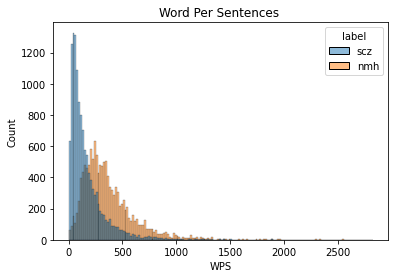

In [ ]:
plt.title("Word Per Sentences ")
sns.histplot(data=df, x="WPS", hue="label")

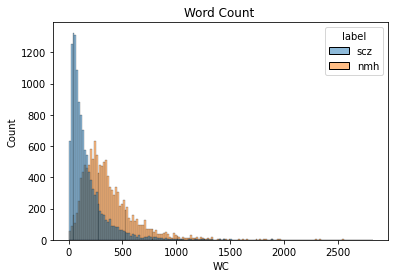

In [ ]:
plt.title("Word Count ")
sns.histplot(data=df, x="WC", hue="label")

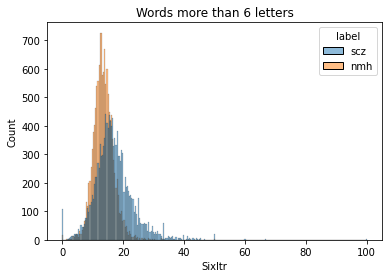

In [ ]:
plt.title("Words more than 6 letters")
sns.histplot(data=df, x="Sixltr", hue="label")

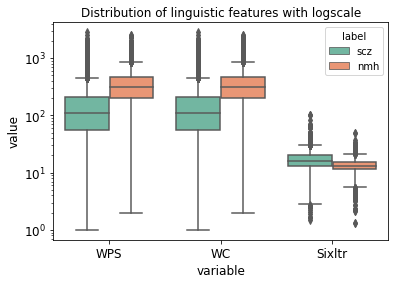

In [ ]:
drawbox(scz, nmh, ['WPS', 'WC', 'Sixltr'], 'linguistic features')

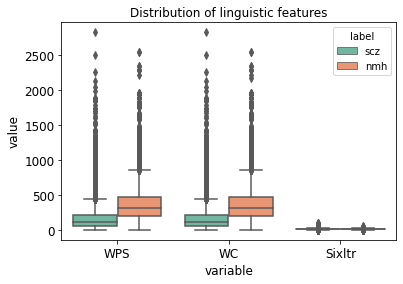

In [ ]:
drawbox(scz, nmh, ['WPS', 'WC', 'Sixltr'], 'linguistic features', log = False)

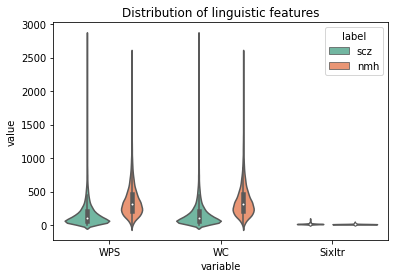

In [ ]:
draw_violin(scz, nmh, ['WPS', 'WC', 'Sixltr'], 'linguistic features')

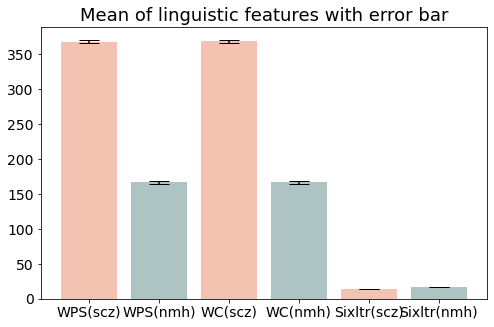

In [ ]:
myplt(nmh,scz, ['WPS', 'WC', 'Sixltr'], 'linguistic features')

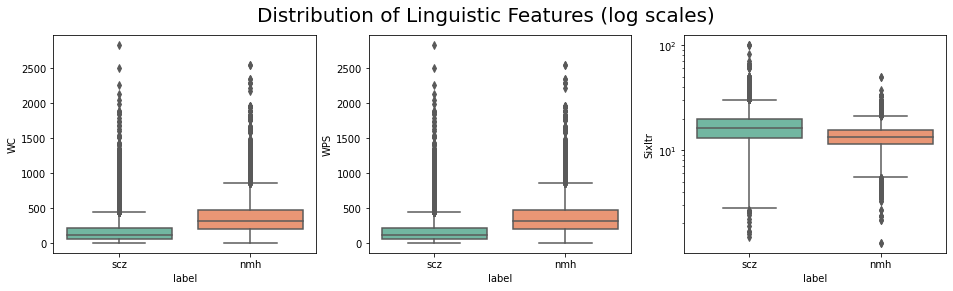

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=3)
plt.suptitle('Distribution of Linguistic Features (log scales)',fontsize=20)
fig.set_size_inches(16, 4)
plt.yscale('log')
sns.boxplot(data = df, x = 'label', y = 'WC', ax=axes[0], palette = "Set2")
plt.yscale('log')
sns.boxplot(data = df, x = 'label', y = 'WPS', ax= axes[1], palette = "Set2")
plt.yscale('log')
sns.boxplot(data = df, x = 'label', y = 'Sixltr', ax= axes[2], palette = "Set2")
plt.yscale('log')

## 3. for Sentimental Analysis

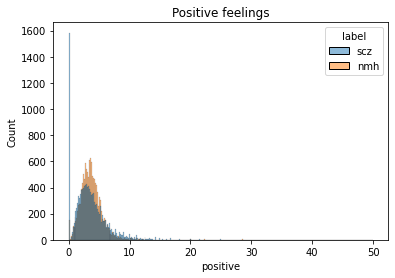

In [ ]:
plt.title("Positive feelings")
sns.histplot(data=df, x="positive", hue="label")

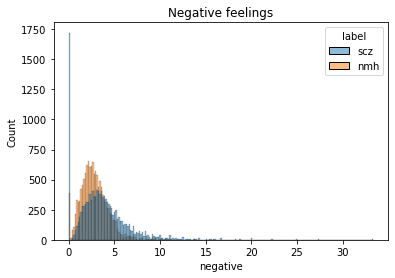

In [ ]:
plt.title("Negative feelings")
sns.histplot(data=df, x="negative", hue="label")

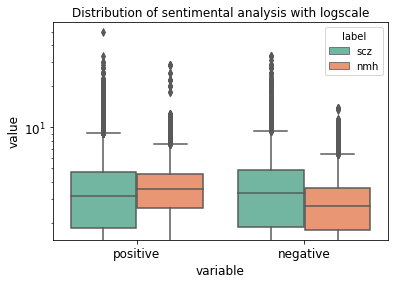

In [ ]:
drawbox(scz, nmh, ['positive', 'negative'], 'sentimental analysis')

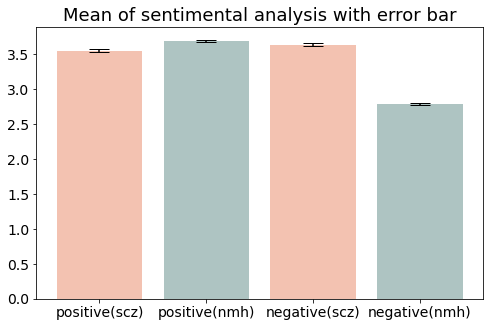

In [ ]:
myplt(scz, nmh, ['positive', 'negative'], 'sentimental analysis')

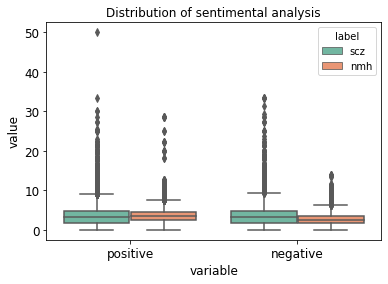

In [ ]:
drawbox(scz, nmh, ['positive', 'negative'], 'sentimental analysis', log = False)

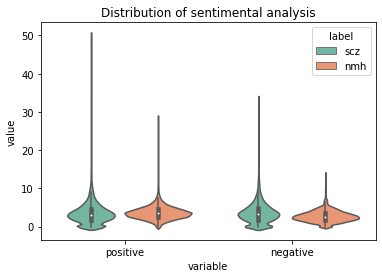

In [ ]:
draw_violin(scz, nmh, ['positive', 'negative'], 'sentimental analysis')

## 4. Sentimental Classifications

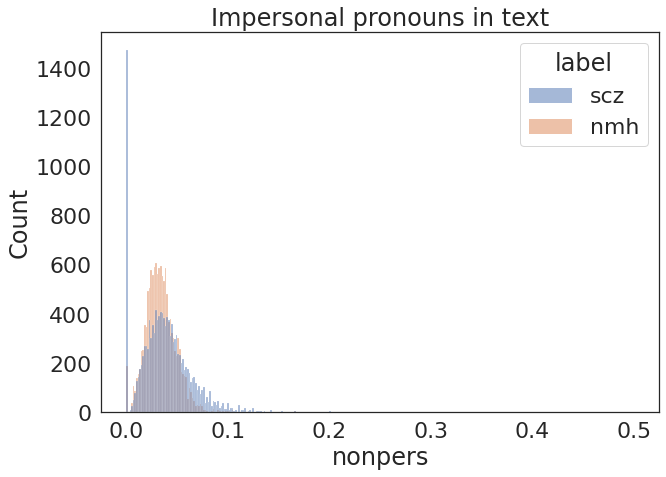

In [ ]:
import seaborn as sns
plt.title("Impersonal pronouns in text")
sns.set(rc={'figure.figsize':(10, 7)}, font_scale=2)
sns.set_style("white")
sns.histplot(data=df, x="nonpers", hue="label")

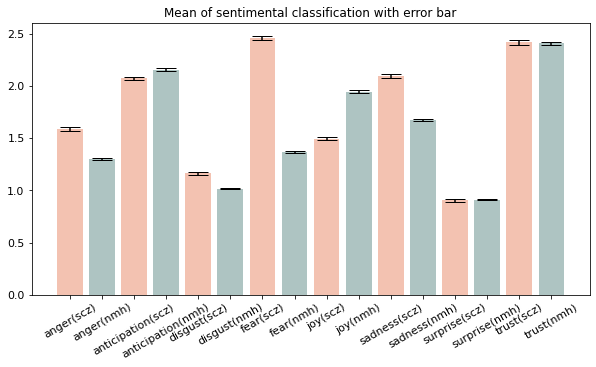

In [ ]:
myplt2(scz, nmh, ['anger', 'anticipation', 'disgust', 'fear', 'joy','sadness', 'surprise', 'trust'], 'sentimental classification')

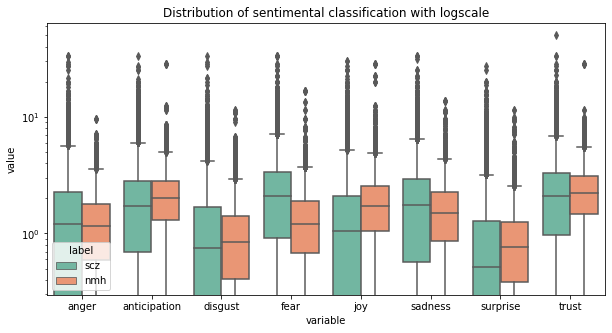

In [ ]:
drawbox2(scz, nmh, ['anger', 'anticipation', 'disgust', 'fear', 'joy','sadness', 'surprise', 'trust'], 'sentimental classification')

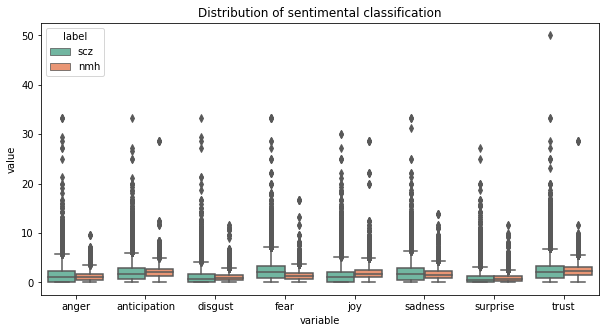

In [ ]:
drawbox2(scz, nmh, ['anger', 'anticipation', 'disgust', 'fear', 'joy','sadness', 'surprise', 'trust'], 'sentimental classification', log = False)

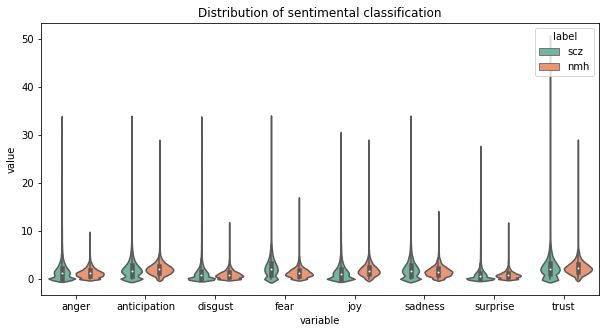

In [ ]:
draw_violin(scz, nmh, ['anger', 'anticipation', 'disgust', 'fear', 'joy','sadness', 'surprise', 'trust'], 'sentimental classification', True)

## 5. Time analyze

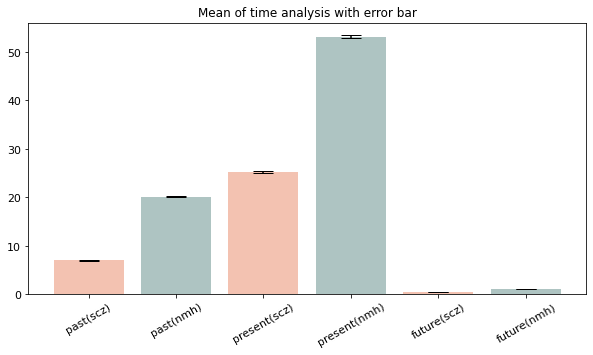

In [ ]:
myplt2(scz, nmh, ['past', 'present', 'future'], 'time analysis')

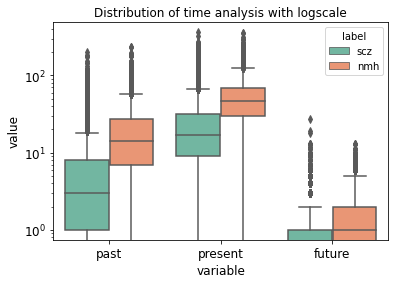

In [ ]:
drawbox(scz, nmh, ['past', 'present', 'future'], 'time analysis')

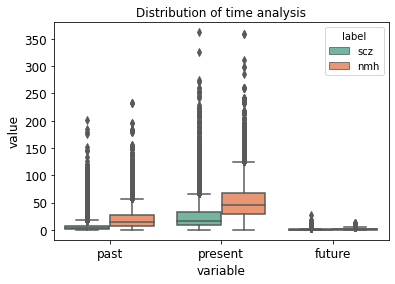

In [ ]:
drawbox(scz, nmh, ['past', 'present', 'future'], 'time analysis', False)

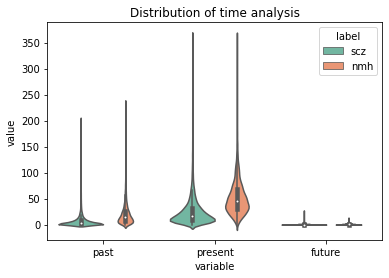

In [ ]:
draw_violin(scz, nmh, ['past', 'present', 'future'], 'time analysis')

## 6. Pronouns analyze

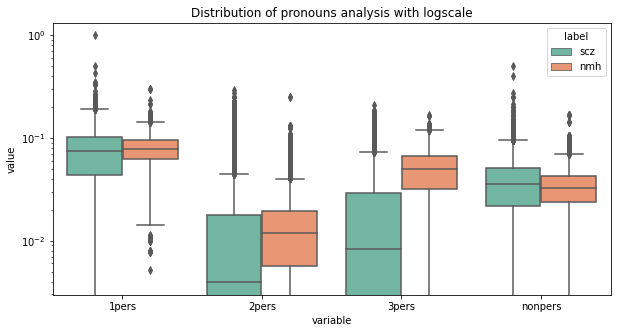

In [ ]:
drawbox2(scz, nmh,['1pers', '2pers', '3pers', 'nonpers'], 'pronouns analysis')

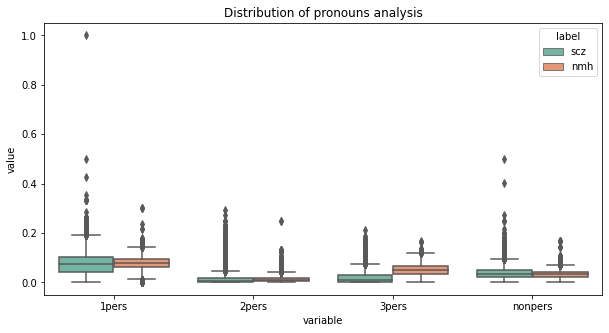

In [ ]:
drawbox2(scz, nmh,['1pers', '2pers', '3pers', 'nonpers'], 'pronouns analysis', False)

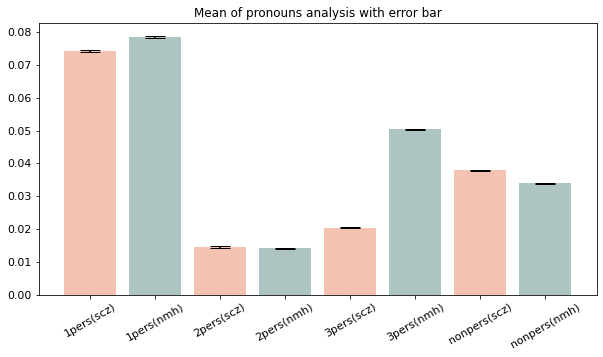

In [ ]:
myplt2(scz, nmh, ['1pers', '2pers', '3pers', 'nonpers'], 'pronouns analysis')

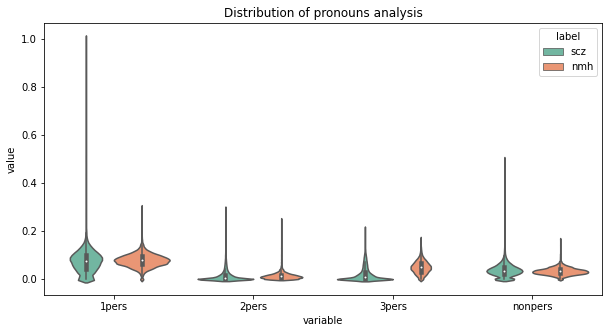

In [ ]:
draw_violin(scz, nmh,['1pers', '2pers', '3pers', 'nonpers'], 'pronouns analysis', True)

## 7. Statistical Analysis

In [ ]:
print(len(nmh), len(scz))

12973 13105


- sample 개수가 충분히 많으므로, parametric analysis 진행

### 1) t test

In [ ]:
import scipy.stats
def ttest(columns, alpha = 0.01):
  stats, p = [],[]
  result = []
  for col in columns:
    temp = scipy.stats.ttest_ind(nmh[col], scz[col], equal_var=False)
    stats.append(temp[0])
    p.append(temp[1])
    result.append('accept Ho' if temp[1]>=alpha else 'reject Ho')
  result = pd.DataFrame({'statistics': stats, 'p-value':p, 'result': result})
  result.index = columns
  return result

In [ ]:
ttest(['WPS', 'WC', 'Sixltr'])

,statistics,p-value,result
WPS,74.357073,0.0,reject Ho
WC,74.308705,0.0,reject Ho
Sixltr,-54.117541,0.0,reject Ho


In [ ]:
ttest(['positive','negative'])

,statistics,p-value,result
positive,4.684141,2.827930e-06,reject Ho
negative,-30.037551,6.835532e-194,reject Ho


In [ ]:
ttest(['anger', 'anticipation', 'disgust', 'fear', 'joy','sadness', 'surprise', 'trust'])

,statistics,p-value,result
anger,-14.984498,1.769067e-50,reject Ho
anticipation,3.922196,8.800951e-05,reject Ho
disgust,-8.757670,2.145234e-18,reject Ho
fear,-47.616989,0.000000e+00,reject Ho
joy,20.839856,1.310652e-95,reject Ho
sadness,-19.457528,1.481859e-83,reject Ho
surprise,0.514645,6.068064e-01,accept Ho
trust,-0.313890,7.536078e-01,accept Ho


In [ ]:
ttest(['past', 'present', 'future'])

,statistics,p-value,result
past,63.898633,0.000000e+00,reject Ho
present,73.863413,0.000000e+00,reject Ho
future,30.580489,1.431187e-201,reject Ho


In [ ]:
ttest(['1pers', '2pers', '3pers', 'nonpers'])

,statistics,p-value,result
1pers,9.741678,2.229112e-22,reject Ho
2pers,-1.316813,1.879169e-01,accept Ho
3pers,88.443101,0.000000e+00,reject Ho
nonpers,-14.932016,3.678272e-50,reject Ho


In [ ]:
ttest(['Comma', 'Colon', 'SemiC', 'QMark', 'Exclam', 'Dash', 'Quote','Apostro', 'Parenth', 'OtherP'])

,statistics,p-value,result
Comma,NaN,NaN,reject Ho
Colon,NaN,NaN,reject Ho
SemiC,9.781902,1.566620e-22,reject Ho
QMark,NaN,NaN,reject Ho
Exclam,NaN,NaN,reject Ho
Dash,1.294484,1.955158e-01,accept Ho
Quote,15.560102,2.387101e-54,reject Ho
Apostro,14.368276,1.234587e-46,reject Ho
Parenth,NaN,NaN,reject Ho
OtherP,11.484557,2.043980e-30,reject Ho


### 2) t-test with bonferroni

In [ ]:
df.columns

Index(['post', 'label', 'post_stemmed', 'docname', 'Segment', 'WPS', 'WC',
       'Sixltr', 'Dic', 'anger', 'anticipation', 'disgust', 'fear', 'joy',
       'negative', 'positive', 'sadness', 'surprise', 'trust', 'AllPunc',
       'Period', 'Comma', 'Colon', 'SemiC', 'QMark', 'Exclam', 'Dash', 'Quote',
       'Apostro', 'Parenth', 'OtherP', '1pers', '2pers', '3pers', 'nonpers',
       'past', 'present', 'future'],
      dtype='object')

In [ ]:
features = ['WPS', 'WC','Sixltr', 'anger', 'anticipation', 'disgust', 'fear', 'joy',
       'negative', 'positive', 'sadness', 'surprise', 'trust', '1pers', '2pers', '3pers', 'nonpers',
       'past', 'present', 'future']
len(features)

20

In [ ]:
import scipy.stats
def ttest_bonf(columns, alpha = 0.01):
  stats, p = [],[]
  result = []
  for col in columns:
    temp = scipy.stats.ttest_ind(nmh[col], scz[col], equal_var=False)
    stats.append(temp[0])
    p.append(temp[1])
    result.append('accept Ho' if temp[1]>=alpha/20 else 'reject Ho')
  result = pd.DataFrame({'statistics': stats, 'p-value':p, 'result': result})
  result.index = columns
  return result

In [ ]:
ttest_bonf(['WPS', 'WC', 'Sixltr'])

,statistics,p-value,result
WPS,74.357073,0.0,reject Ho
WC,74.308705,0.0,reject Ho
Sixltr,-54.117541,0.0,reject Ho


In [ ]:
ttest_bonf(['positive', 'negative'])

,statistics,p-value,result
positive,4.684141,2.827930e-06,reject Ho
negative,-30.037551,6.835532e-194,reject Ho


In [ ]:
ttest_bonf(['anger', 'anticipation', 'disgust', 'fear', 'joy','sadness', 'surprise', 'trust'])

,statistics,p-value,result
anger,-14.984498,1.769067e-50,reject Ho
anticipation,3.922196,8.800951e-05,reject Ho
disgust,-8.757670,2.145234e-18,reject Ho
fear,-47.616989,0.000000e+00,reject Ho
joy,20.839856,1.310652e-95,reject Ho
sadness,-19.457528,1.481859e-83,reject Ho
surprise,0.514645,6.068064e-01,accept Ho
trust,-0.313890,7.536078e-01,accept Ho


In [ ]:
ttest_bonf(['i', '2pers', '3pers', 'nonpers'])

,statistics,p-value,result
1pers,9.741678,2.229112e-22,reject Ho
2pers,-1.316813,1.879169e-01,accept Ho
3pers,88.443101,0.000000e+00,reject Ho
nonpers,-14.932016,3.678272e-50,reject Ho


In [ ]:
ttest_bonf(['past', 'present', 'future'])

,statistics,p-value,result
past,63.898633,0.000000e+00,reject Ho
present,73.863413,0.000000e+00,reject Ho
future,30.580489,1.431187e-201,reject Ho


# table for mean& std

In [ ]:
values.append(np.mean(scz[col]))
      values.append(np.mean(nmh[col]))
      print(values)
      yerr.append(stats.sem(scz[col]))
      yerr.append(stats.sem(nmh[col]))

In [ ]:
nmh.columns

Index(['post', 'post_stemmed', 'docname', 'Segment', 'WPS', 'WC', 'Sixltr',
       'Dic', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative',
       'positive', 'sadness', 'surprise', 'trust', 'AllPunc', 'Period',
       'Comma', 'Colon', 'SemiC', 'QMark', 'Exclam', 'Dash', 'Quote',
       'Apostro', 'Parenth', 'OtherP', '1pers', '2pers', '3pers', 'nonpers',
       'past', 'present', 'future'],
      dtype='object')

In [ ]:
s_mean = []
n_mean = []
s_std = []
n_std = []
columns = ['WPS', 'WC', 'Sixltr', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust', 
           '1pers', '2pers', '3pers', 'nonpers', 'past', 'present', 'future']

for col in columns:
  s_mean.append(np.mean(scz[col]))
  n_mean.append(np.mean(nmh[col]))
  s_std.append(stats.sem(scz[col]))
  n_std.append(stats.sem(nmh[col]))



In [ ]:
result = pd.DataFrame(s_mean, n_mean, s_std, n_std)

TypeError: ignored

In [ ]:
df1 = pd.DataFrame(n_mean, index = columns, columns = ['nmh_mean'])
df1

,nmh_mean
WPS,367.590765
WC,367.687736
Sixltr,13.496525
anger,1.297861
anticipation,2.157559
disgust,1.016329
fear,1.369723
joy,1.946647
negative,2.783585
positive,3.690285


In [ ]:
df2 = pd.DataFrame(s_mean, index = columns, columns = ['scz_mean'])
df3 = pd.DataFrame(n_std, index = columns, columns = ['nmh_std'])
df4 = pd.DataFrame(s_std, index = columns, columns = ['scz_std'])

In [ ]:
pd.concat([df1, df2, df3, df4], axis = 1)

,nmh_mean,scz_mean,nmh_std,scz_std
WPS,367.590765,166.292902,2.175626,1.611045
WC,367.687736,166.310877,2.179171,1.611004
Sixltr,13.496525,16.955034,0.029280,0.056805
anger,1.297861,1.585414,0.008766,0.017071
anticipation,2.157559,2.071899,0.011743,0.018414
disgust,1.016329,1.164013,0.008206,0.014732
fear,1.369723,2.459623,0.009378,0.020879
joy,1.946647,1.495069,0.012935,0.017385
negative,2.783585,3.639851,0.013304,0.025211
positive,3.690285,3.552930,0.015862,0.024663


In [ ]:
pd.concat([df1, df2, df3, df4], axis = 1).to_csv('statistics.csv')

In [ ]:
!pwd

/content


# MWU

In [ ]:
cols= ['WPS', 'WC', 'Sixltr', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust', 
           '1pers', '2pers', '3pers', 'nonpers', 'past', 'present', 'future']

In [ ]:
for col in cols:
    print("=====================",col, "=====================")
    print(stats.shapiro(scz[col]))
    print(stats.shapiro(nmh[col]))

===================== WPS =====================
(0.6955338716506958, 0.0)
(0.8560263514518738, 0.0)
===================== WC =====================
(0.6955810189247131, 0.0)
(0.8546919226646423, 0.0)
===================== Sixltr =====================
(0.9162692427635193, 0.0)
(0.9680810570716858, 0.0)
===================== anger =====================
(0.7236424684524536, 0.0)
(0.9195576310157776, 0.0)
===================== anticipation =====================
(0.7915852665901184, 0.0)
(0.8469820022583008, 0.0)
===================== disgust =====================
(0.6627833843231201, 0.0)
(0.8332685232162476, 0.0)
===================== fear =====================
(0.8018574714660645, 0.0)
(0.8550492525100708, 0.0)
===================== joy =====================
(0.6940734386444092, 0.0)
(0.7839135527610779, 0.0)
===================== negative =====================
(0.8646804690361023, 0.0)
(0.9486733078956604, 0.0)
===================== positive =====================
(0.8580095767974854, 0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
tTesttTest[1]

2.8547166565362186e-286

In [ ]:
from scipy.stats import mannwhitneyu
for col in cols:
    print("=====================",col, "=====================")
    tTesttTest = mannwhitneyu(scz[col], nmh[col])
    #tTestResultDiffVar = stats.ttest_ind(schizo_dataset[topic], non_schizo_dataset[topic], equal_var=False)
    print(tTesttTest)
    if tTesttTest[1]>0.01: print('accept')
    else: print('reject')
    #print(tTestResultDiffVar)
print("\n")
print("\n")
print("\n")
    
for col in cols:
    print("=====================",col, "=====================")
    tTesttTest = mannwhitneyu(nmh[col], scz[col])
    #tTestResultDiffVar = stats.ttest_ind(schizo_dataset[topic], non_schizo_dataset[topic], equal_var=False)
    print(tTesttTest)
    if tTesttTest[1]>0.01: print('accept')
    else: print('reject')
    #print(tTestResultDiffVar)

===================== WPS =====================
MannwhitneyuResult(statistic=32367498.0, pvalue=0.0)
reject
===================== WC =====================
MannwhitneyuResult(statistic=32359731.5, pvalue=0.0)
reject
===================== Sixltr =====================
MannwhitneyuResult(statistic=51972295.5, pvalue=0.0)
reject
===================== anger =====================
MannwhitneyuResult(statistic=84563259.0, pvalue=0.2768438697376921)
accept
===================== anticipation =====================
MannwhitneyuResult(statistic=74153915.0, pvalue=9.082350902712684e-71)
reject
===================== disgust =====================
MannwhitneyuResult(statistic=78657702.0, pvalue=1.000122966309792e-25)
reject
===================== fear =====================
MannwhitneyuResult(statistic=59372642.5, pvalue=0.0)
reject
===================== joy =====================
MannwhitneyuResult(statistic=59726151.0, pvalue=0.0)
reject
===================== negative =====================
MannwhitneyuRe